# Lesson 0006 - Breast Cancer Classification Linear Classifier
We assume, that the reader has worked through all the previous lessons.<br>
In this lesson, we introduce a new dataset.<br>
First, we will load this data set, then we will perform exploratory analysis on this data, then, we will train a linear classifier on this data set, which we later will improve by fine tuning.<br>
We begin by loading the [breast cancer data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) and printing the version number of sklearn:

In [1]:
import sklearn as sklearn
from sklearn.datasets import load_breast_cancer as lbc

print( sklearn.__version__ )

0.19.1


We now load the dataset and store it in __data__.<br>
We then extract the features and store them in __data_x__ and the target and store them in __data_y__.

In [2]:
data = lbc()

data_x = data.data

data_y = data.target

We start our exploratory analysis by printing the first item of __data_x__:

In [3]:
print( data_x[ 0 ] )

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


Seems like we got numerical data in __data_x__.<br>
But let's do the counting of dimensions by Python:

In [4]:
print( len( data_x[ 0 ] ) )

30


So we got $30$ dimensions of numerical data in __data_x__. How about __data_y__?

In [5]:
print( data_y[ 0 ] )

0


The data in __data_y__ are 1-dimensional, but we have no idea, how many classes there are.<br>
Let's import NumPy and use its function unique to determine the number of classes.<br> 
Also, we will print the version number of NumPy and set a seed for reproducability.

In [6]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.14.3


In [7]:
print( np.unique( data_y ) )

[0 1]


Ok, we got $2$ classes, but how many data points?

In [8]:
print( len( data_y ) )

569


Since we have $30$ dimensions in __data_x__, plotting is not really an option.<br>
Therefore, we will continue by splitting the data into a training set of $400$ items and the rest is for testing.<br>
Then we will standardize the data.

In [9]:
train_x = np.zeros( shape = [ 400, 30 ] )

train_y = np.zeros( shape = [ 400, 2 ] )

test_x = np.zeros( shape = [ 169, 30 ] )

test_y = np.zeros( shape = [ 169, 2 ] )



random_integers = np.random.choice( range( 569 ), 400, replace = False )

random_integers = np.sort( random_integers )



j = 0

k = 0



for i in range( 569 ):
    
    if i == random_integers[ j ]:
        
        train_x[ j, : ] = data_x[ i, : ]
        
        train_y[ j, data_y[ i ] ] = 1.0
        
        j = j + 1
        
        if j == 400:
            
            j = 0
            
    else:
        
        test_x[ k, : ] = data_x[ i, : ]
        
        test_y[ k, data_y[ i ] ] = 1.0
        
        k = k + 1
        
        
        
        
mu = np.zeros( shape = [ 30 ] )

sigma = np.zeros( shape = [ 30 ] )




for i in range( 30 ):
    
    mu[ i ] = np.mean( train_x[ :, i ] )
    
    sigma[ i ] = np.std( train_x[ :, i ] )
    
    
    
    
for i in range( 30 ):
    
    train_x[ :, i ] = ( train_x[ :, i ] - mu[ i ] ) / sigma[ i ]
    
    test_x[ :, i ] = ( test_x[ :, i ] - mu[ i ] ) / sigma[ i ]

Now, we basically steal the code for the linear classifier from [lesson 0001](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0001_iris_classification_linear_classifier.ipynb).<br>
We start by importing tensorflow, printing the version number and setting the random seed.

In [10]:
import tensorflow as tf

tf.random.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [11]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 30 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 2 ] )

W_tf = tf.Variable( tf.zeros( [ 30, 2 ] ) )

b_tf = tf.Variable( tf.zeros( [ 2 ] ) )

classifier = tf.matmul( x_tf, W_tf ) + b_tf



cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier, labels = y_tf ) )



gd = tf.train.GradientDescentOptimizer( 1e-4 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( classifier, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

In [12]:
progress_train_s = []

progress_train = []

progress_test = []


sess = tf.Session()

sess.run( tf.global_variables_initializer() )

for i in range( 500 ):
    
    random_integers = np.random.choice( range( 400 ), 30, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
    
    progress_train_s.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
    
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
    
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )
    
    
sess.close()

We have basically reproduced [lesson 0001](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0001_iris_classification_linear_classifier.ipynb).<br>
Let us import matplotlib and print the version number.

In [13]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

2.2.2


Text(0,0.5,'Accuracy (%)')

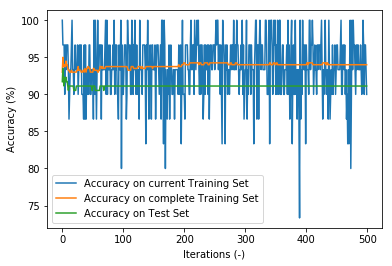

In [14]:
plt.plot( progress_train_s, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

We notice, that after the first $100$ iterations, the accuracy does not improve.<br>
Therefore, we will perform a grid search for the best parameters.<br>
We will consider training set sizes between $10$ and $150$ and learning rates between $1e-8$ and $1$.<br>
We will perform with each combination $100$ iterations and evaluate the accuracy.<br>
For this end, we will define a new model.<br>
Also, we split the training set into a training set for the optimization of size $300$, one validation set of size $100$ to evaluate the performance of a given combination.

In [15]:
train_x_2 = np.zeros( shape = [ 300, 30 ] )

train_y_2 = np.zeros( shape = [ 300, 2 ] )

val_x_2 = np.zeros( shape = [ 100, 30 ] )

val_y_2 = np.zeros( shape = [ 100, 2 ] )





random_integers = np.random.choice( range( 400 ), 300, replace = False )

random_integers = np.sort( random_integers )




j = 0

k = 0



for i in range( 400 ):
    
    if i == random_integers[ j ]:
        
        train_x_2[ j, : ] = train_x[ i, : ]
        
        train_y_2[ j, : ] = train_y[ i, : ]
        
        j = j + 1
        
        if j == 300:
            
            j = 0
            
    else:
        
        val_x_2[ k, : ] = train_x[ i, : ]
        
        val_y_2[ k, : ] = train_y[ i, : ]
        
        k = k + 1

In [16]:
x_tf_2 = tf.placeholder( tf.float32, shape = [ None, 30 ] )

y_tf_2 = tf.placeholder( tf.float32, shape = [ None, 2 ] )

learning_rate_tf = tf.placeholder( tf.float32 )

W_tf_2 = tf.Variable( tf.zeros( [ 30, 2 ] ) )

b_tf_2 = tf.Variable( tf.zeros( [ 2 ] ) )

classifier_2 = tf.matmul( x_tf_2, W_tf_2 ) + b_tf_2



cross_entropy_2 = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier_2, labels = y_tf_2 ) )



gd_2 = tf.train.GradientDescentOptimizer( learning_rate_tf ).minimize( cross_entropy_2 )



hit_2 = tf.equal( tf.argmax( classifier_2, 1 ), tf.argmax( y_tf_2, 1 ) )



accuracy_2 = 100 * tf.reduce_mean( tf.cast( hit_2, tf.float32 ) )

In [17]:
grid_sample_size = [ 10, 20, 30, 50, 75, 100, 125, 150 ]

grid_learning_rate = [ 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1 ]

result_matrix = np.zeros( shape = [ 8, 9 ] )

sess = tf.Session()

for i in range( 8 ):
    
    sample_size = grid_sample_size[ i ]
    
    for j in range( 9 ):
        
        learning_rate = grid_learning_rate[ j ]

        sess.run( tf.global_variables_initializer() )

        for k in range( 100 ):
    
            random_integers = np.random.choice( range( 300 ), sample_size, replace = False )
    
            local_x = train_x_2[ random_integers, : ]
    
            local_y = train_y_2[ random_integers, : ]
    
            sess.run( gd_2, feed_dict = { x_tf_2 : local_x, y_tf_2 : local_y, learning_rate_tf : learning_rate } )
    
        result_matrix[ i, j ] = sess.run( accuracy_2, feed_dict = { x_tf_2 : val_x_2, y_tf_2 : val_y_2 } )
        
        
sess.close()

Now we plot the matrix.<br>
We use the function [matshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html) for plotting the matrix.<br>
We use the function [xticks](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) to replace the __x-ticks__ of the plot with the __learning_rate__. For this, we need the function [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).<br>
We do the same for the __y-ticks__.<br>
Finally, we use the function [colorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html) to get a colorbar, so we can interprete the image.<br>
Also, we use the function [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html) to get the current Axis object __ax__. We then use __ax__ with the function [set ticks position](https://matplotlib.org/api/_as_gen/matplotlib.axis.XAxis.set_ticks_position.html) to set the __x-ticks__ under the plot.

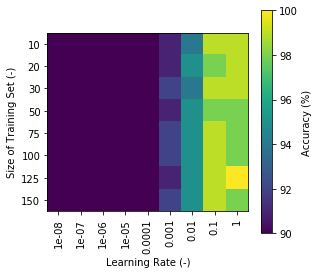

In [18]:
plt.matshow( result_matrix )

ax = plt.gca()

ax.xaxis.set_ticks_position( 'bottom' )

plt.xticks( np.arange( len( grid_learning_rate ) ), grid_learning_rate, rotation = 90 )

plt.xlabel( 'Learning Rate (-)' )

plt.yticks( np.arange( len( grid_sample_size ) ), grid_sample_size )

plt.ylabel( 'Size of Training Set (-)' )

plt.colorbar( label = 'Accuracy (%)' )

From this, we learn, that the sample size is not really important, but the learning rate makes all the difference.<br>
Let's train a third model for $500$ iterations with a learning rate of $0.1$ and a sample size of $50$.

In [19]:
x_tf_3 = tf.placeholder( tf.float32, shape = [ None, 30 ] )

y_tf_3 = tf.placeholder( tf.float32, shape = [ None, 2 ] )

W_tf_3 = tf.Variable( tf.zeros( [ 30, 2 ] ) )

b_tf_3 = tf.Variable( tf.zeros( [ 2 ] ) )

classifier_3 = tf.matmul( x_tf_3, W_tf_3 ) + b_tf_3



cross_entropy_3 = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = classifier_3, labels = y_tf_3 ) )



gd_3 = tf.train.GradientDescentOptimizer( 0.1 ).minimize( cross_entropy_3 )



hit_3 = tf.equal( tf.argmax( classifier_3, 1 ), tf.argmax( y_tf_3, 1 ) )



accuracy_3 = 100 * tf.reduce_mean( tf.cast( hit_3, tf.float32 ) )

In [20]:
progress_train_s_3 = []

progress_train_3 = []

progress_test_3 = []


sess = tf.Session()

sess.run( tf.global_variables_initializer() )

for i in range( 500 ):
    
    random_integers = np.random.choice( range( 400 ), 50, replace = False )
    
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd_3, feed_dict = { x_tf_3 : local_x, y_tf_3 : local_y } )
    
    progress_train_s_3.append( sess.run( accuracy_3, feed_dict = { x_tf_3 : local_x, y_tf_3 : local_y } ) )
    
    progress_train_3.append( sess.run( accuracy_3, feed_dict = { x_tf_3 : train_x, y_tf_3 : train_y } ) )
    
    progress_test_3.append( sess.run( accuracy_3, feed_dict = { x_tf_3 : test_x, y_tf_3 : test_y } ) )
    
    
sess.close()

Text(0,0.5,'Accuracy (%)')

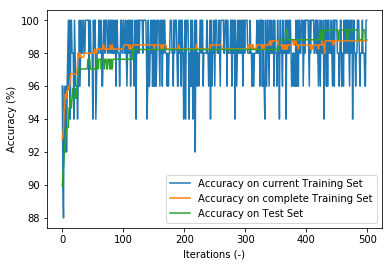

In [21]:
plt.plot( progress_train_s_3, label = 'Accuracy on current Training Set' )

plt.plot( progress_train_3, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test_3, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

So, we reached an accuracy of $98\%$ on the test set. This means, only $3$ samples were misclassified, therefore, we can not really improve any more.<br>
Therefore<br>
Class dismissed.